<a href="https://colab.research.google.com/github/joseeden/joeden/blob/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/001-Using-Pandas/010-dates-and-times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dates and Times

In this example, we are using a bike CSV file, which contains ride data like start date, end date, start station, end station, bike number, and whether the rider is a member or casual user.
<!-- 
To start with, make sure to install Pandas first:

```python
!pip install pandas
``` -->

Import the dataset:

In [169]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/joseeden/joeden/refs/heads/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/dates-and-times/capital-onebike.csv'
rides = pd.read_csv(url)

print(rides.head(3))

            Start date             End date  Start station number  \
0  2017-10-01 15:23:25  2017-10-01 15:26:26                 31038   
1  2017-10-01 15:42:57  2017-10-01 17:49:59                 31036   
2  2017-10-02 06:37:10  2017-10-02 06:42:53                 31036   

                   Start station  End station number  \
0           Glebe Rd & 11th St N               31036   
1  George Mason Dr & Wilson Blvd               31036   
2  George Mason Dr & Wilson Blvd               31037   

                            End station Bike number Member type  
0         George Mason Dr & Wilson Blvd      W20529      Member  
1         George Mason Dr & Wilson Blvd      W20529      Casual  
2  Ballston Metro / N Stuart & 9th St N      W20529      Member  


## Columns and Rows

We can access specific columns or rows easily.

- Get a column using `rides['Start date']`
- Get a row using `rides.iloc[2]`
- Note that date columns are treated as strings by default

Working with strings for dates is limiting, so we usually convert them to datetime objects.

In [170]:
print(rides['Start date'])
print(rides.iloc[2])

0      2017-10-01 15:23:25
1      2017-10-01 15:42:57
2      2017-10-02 06:37:10
3      2017-10-02 08:56:45
4      2017-10-02 18:23:48
              ...         
285    2017-12-29 14:32:55
286    2017-12-29 15:08:26
287    2017-12-29 20:33:34
288    2017-12-30 13:51:03
289    2017-12-30 15:09:03
Name: Start date, Length: 290, dtype: object
Start date                               2017-10-02 06:37:10
End date                                 2017-10-02 06:42:53
Start station number                                   31036
Start station                  George Mason Dr & Wilson Blvd
End station number                                     31037
End station             Ballston Metro / N Stuart & 9th St N
Bike number                                           W20529
Member type                                           Member
Name: 2, dtype: object


## Converting Columns to Datetime

Pandas can automatically convert columns to datetime when loading CSVs.

- Use `parse_dates` argument in `read_csv()`
- Pass a list of column names to convert, e.g., `['Start date', 'End date']`
- Pandas guesses the format; use `pd.to_datetime()` if needed

In [171]:
url = 'https://raw.githubusercontent.com/joseeden/joeden/refs/heads/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/dates-and-times/capital-onebike.csv'
rides = pd.read_csv(url, 
                    parse_dates=['Start date', 'End date'])
print(type(rides.loc[2, 'Start date']))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Now the `Start date` column is a `Timestamp`, and you can do all datetime operations on it (like `.year`, `.month`, `.hour`, arithmetic, etc.).

For example:

In [172]:
ride_start = rides.loc[2, 'Start date']

print(ride_start.year)   # 2017
print(ride_start.month)  # 10
print(ride_start + pd.Timedelta(hours=2))  # add 2 hours

2017
10
2017-10-02 08:37:10


## Calculating Duration

Once dates are datetime objects, we can calculate durations easily by subtracting the `Start date` column from the `End date` column. The result is a timedelta for each row.

In [173]:
ride_durations = rides['End date'] - rides['Start date']
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64


## Summarizing Data 

Pandas makes it easy to summarize data, including datetime columns. Make sure you are using Pandas version 0.23 or newer, because older versions may not support some methods.

- Use `.mean()`, `.median()`, `.sum()` on numeric columns
- Group by columns or time using `.groupby()` or `.resample()`
- Convert durations to seconds for easier calculations

## Calculating Mean and Total

Numeric columns like `Duration` can be summarized directly.

- `rides['Duration'].mean()` gives the average ride time
- `rides['Duration'].sum()` gives total ride time over a period

In [174]:
average_duration = rides['Duration'].mean()
total_duration = rides['Duration'].sum()

print(average_duration)
print(total_duration)

1178.9310344827586
341890.0


The mean shows typical ride length, and the sum shows how long bikes were out in total. You can also combine with Python operations, like dividing by total days to get percentages.

In [175]:
rides['Duration'] = rides['End date'] - rides['Start date']

# Total duration bikes were out
total_duration_seconds = rides['Duration'].sum().total_seconds()

# total days in the dataset converted to seconds
total_period_seconds = 91 * 24 * 60 * 60  # 91 days in seconds

# Fraction of time bikes were out
percent_out_of_dock = total_duration_seconds / total_period_seconds
print(percent_out_of_dock)

0.04348417785917786


Based on the output, we can see that bikes were out of the dock about **4.3%** of the time.

## Summarizing Non-Numeric Columns

For categorical data, Pandas has special methods:

- Use `.value_counts()` to count occurrences of each value
- Divide counts by total rows with `len(rides)` to get percentages

In [176]:
member_counts = rides['Member type'].value_counts()
member_percent = member_counts / len(rides) 

print(member_counts)
print(member_percent)

Member type
Member    236
Casual     54
Name: count, dtype: int64
Member type
Member    0.813793
Casual    0.186207
Name: count, dtype: float64


## Grouping by Columns

You can use `.groupby(column)` to group rows and summarize each group separately. You can also apply aggregation methods like `mean()`, `sum()`, `size()`, or `first()` on each group.

In [177]:
rides['Duration seconds'] = rides['Duration'].dt.total_seconds()
grouped = rides.groupby('Member type')['Duration seconds'].mean()
print(grouped)

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64


This shows that casual rides are usually longer than member rides. Grouping lets you compare different categories easily.

## Grouping by Time

Datetime columns can also be grouped by time using `.resample()`.

- `.resample('M', on='Start date')` groups rides by month
- Aggregations like `mean()` can be applied to each time period

In [178]:
monthly_avg = rides.resample('ME', on='Start date')['Duration seconds'].mean()
print(monthly_avg)

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: ME, Name: Duration seconds, dtype: float64


## Plotting Summaries

Pandas can plot grouped data quickly.

- Add `.plot()` at the end of your summary to visualize results
- ResamplING can be monthly(`M`) or daily (`D`)

<Axes: xlabel='Start date'>

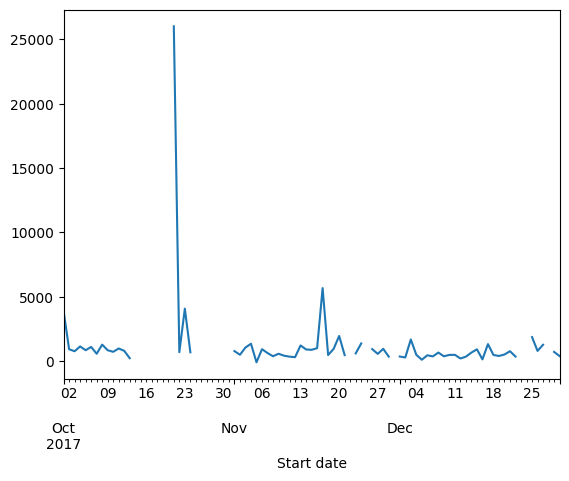

In [179]:
rides.resample('D', on='Start date')['Duration seconds'].mean().plot()

## Working with Timezones 

Handling timezones is important to get accurate results with datetime data. Ride durations can appear negative if timezones are ignored, especially around Daylight Saving changes.

- Timezone-naive datetimes have no UTC offset
- dt.tz_localize() adds a timezone to a datetime column

We can use `dt.tz_localize()` to add a timezone to a datetime column and apply the correct UTC offset, which fixes errors caused by Daylight Saving.

In [183]:
# Localize the first three Start dates to America/New_York
rides['Start date'].head(3).dt.tz_localize('America/New_York')


0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

## Handling Ambiguous Times

Sometimes a datetime falls during a Daylight Saving transition, causing an **AmbiguousTimeError**. You can resolve it by using the `ambiguous` argument in `dt.tz_localize()`. 

Setting `ambiguous='NaT'` marks the problematic rows as `Not a Time`, which Pandas ignores in calculations.

In [184]:
# Make both Start date and End date timezone-aware in America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')
rides['End date'] = rides['End date'].dt.tz_localize('America/New_York', ambiguous='NaT')

# Now calculate durations in seconds
rides['Duration'] = (rides['End date'] - rides['Start date']).dt.total_seconds()

# Check minimum duration
print(rides['Duration'].min())


116.0


Rows that were ambiguous now have `NaT` for `Start date` or `End date`, so their `Duration` is also `NaT`. Pandas safely ignores these when performing aggregations.

To inspect the problematic rows:

In [185]:
rides[rides['Duration'].isna()]

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration,Duration seconds
129,NaT,NaT,31615,6th & H St NE,31627,3rd & M St NE,W20529,Member,NaN,-3346.0


Since we know that the row we want is at 129, we can use `iloc` to access it directly.

In [186]:
rides.iloc[129]

Start date                        NaT
End date                          NaT
Start station number            31615
Start station           6th & H St NE
End station number              31627
End station             3rd & M St NE
Bike number                    W20529
Member type                    Member
Duration                          NaN
Duration seconds              -3346.0
Name: 129, dtype: object

This shows all the details for that ride, including start and end stations, bike number, member type, and duration. Some values, like `Start date` and `Duration`, may be missing or invalid, which can happen in real datasets.

## Other Datetime Operations

Pandas has many convenient datetime attributes and methods beyond basic Python:

- `dt.year`, `dt.month`, `dt.day` to access parts of the datetime
- `dt.day_name()` returns the day of the week
- You can group and aggregate data by year, month, or day name

Example: 


In [187]:
rides['Start date'].dt.year.head(3)
rides['Start date'].dt.day_name().head(3)

0    Sunday
1    Sunday
2    Monday
Name: Start date, dtype: object

## Shifting rows

Pandas allows shifting rows up or down with `shift()`. This is useful for comparing consecutive rides.

- `shift()` moves rows up or down
- Useful to align previous row data with current row
- `NaT` fills the empty positions created by the shift

Example: Shift rides one row forward

In [188]:
rides['Start date'].shift(1).head(3)

0                         NaT
1   2017-10-01 15:23:25-04:00
2   2017-10-01 15:42:57-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

Now you can compare each ride’s start time with the previous ride’s start or end time.

## Examples

### How many joyrides?

“Joyrides” are rides that start and end at the same dock. We only have data for one bike, but it’s interesting to see how many there are and how long they last.

Use the median duration instead of the mean, since a few very long trips could skew the average.

In [ ]:
rides['Duration'] = (rides['End date'] - rides['Start date']).dt.total_seconds()

# Create joyrides 
joyrides = (rides['Start station'] == rides['End station'])
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))


6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


This shows that there were 6 joyrides, with a median duration of about 44 minutes, which is much longer than the overall median of 11 minutes. This suggests that joyrides tend to last longer than regular rides.

### Members vs Casual Riders over Time

Riders are either "Members," who pay yearly for unlimited bike access, or "Casual," who pay at the kiosk for single rides.

We want to see if members and casual riders decrease at the same rate from October to December, or if one group drops off faster.

We can use the Pandas method `value_counts()` to count how many rides come from members versus casual riders.

In [ ]:
monthly_rides = rides.resample('ME', on='Start date')['Member type']

# Ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())


Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
dtype: float64


This shows that in October, about 77% of rides were from members and 23% from casual riders. By December, the percentage of member rides increased to about 86%, while casual rides dropped to about 14%. This indicates that casual riders decreased faster than members over the months.

### Median Ride Duration by Member Type

We can see how ride lengths differ between members and casual riders over time. Using groupby('Member type').resample() lets us calculate statistics like the median ride duration for each month and membership type.

In [ ]:
grouped = rides.groupby('Member type')\
               .resample('ME', on='Start date')

print(grouped['Duration'].median())


Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


### How Long Per Weekday?

We can find the median ride duration for each day of the week. The code adds a new column for the weekday of each ride, then groups rides by that weekday to calculate the median duration.

In [189]:
rides['Ride start weekday'] = rides['Start date'].dt.day_name()
print(rides.groupby('Ride start weekday')['Duration'].median())

Ride start weekday
Friday       724.5
Monday       810.5
Saturday     462.0
Sunday       917.0
Thursday     652.0
Tuesday      641.5
Wednesday    585.0
Name: Duration, dtype: float64


### Time Between Rides

We can also see how much time passes between rides by shifting the previous ride’s end date and subtracting it from the current ride’s start date.

In [191]:
# Shift index of the end date up one
# Then subtract it from the start date
rides['Time since'] = rides['End date'].shift(1)
rides['Time since'] = rides['Start date'] - rides['Time since']

# Move from a timedelta to a number of seconds
rides['Time since'] = rides['Time since'].dt.total_seconds()

monthly = rides.resample('ME', on='Start date')
print(monthly['Time since'].mean() / (60*60))

Start date
2017-10-31 00:00:00-04:00    5.519242
2017-11-30 00:00:00-05:00    7.256474
2017-12-31 00:00:00-05:00    9.202380
Name: Time since, dtype: float64
